# Aufgabe: Ensemble Methoden

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.ensemble import VotingClassifier

import matplotlib.pyplot as plt


In [2]:
import warnings

warnings.filterwarnings("ignore")

### Aufgabe 1:

Laden Sie den Wine Datensatz und trainieren Sie folgende Modelle:

- [kNN Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [Logistische Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- [Random Forest Classifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [AdaBoost Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

Zeigen Sie mittels einer geeigneten Metrik, welches Modell am besten geeignet ist.

Führen Sie im Anschluss all diese Modelle in ein großes Ensemble Modell zusammen. Verwenden Sie dafür den VotingClassifier von sklearn.

Ist Ihr VotingClassifier leistungsstärker als die einzelnen Modelle?


In [3]:
# Laden des Datensatzes
data = load_wine()
x = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Teilen des Datensatzes
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [4]:
# Definiere die Modelle in einem Dictionary
models = {
    "Adaboost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistische Regression": LogisticRegression(),
    "kNN": KNeighborsClassifier(),
}

In [5]:
# Gehe durch die Modelle im Dictionary und trainiere sie
for name, model in models.items():
    model.fit(x_train,y_train)

    # Berechne die Accuracy für jedes Modell in Prozent
    print("Model {} scored with an accuracy of {:.2f}%".format(name, model.score(x_test, y_test)*100))

# Definiere einen Voting Classifier mit allen Modellen
vc = VotingClassifier([(name, model) for name, model in models.items()])

# Trainiere und berechne die Accuracy
vc.fit(x_train, y_train)

print(
    "Ensemble model scored with an accuracy of {:.2f}%".format(
        vc.score(x_test, y_test) * 100
    )
)

Model Adaboost scored with an accuracy of 97.78%
Model Random Forest scored with an accuracy of 100.00%
Model Decision Tree scored with an accuracy of 93.33%
Model Logistische Regression scored with an accuracy of 100.00%
Model kNN scored with an accuracy of 73.33%
Ensemble model scored with an accuracy of 97.78%



### Aufgabe 2: Random Forest

Trainieren Sie Decision Tree sowie Random Forest (zB aus sklearn) an dem von Ihnen für die Abschlussarbeit gewählten Datensatz. Visualisieren Sie (wenn möglich) das Ergebnis, welches Modell liefert bessere Ergebnisse? Welches Modell wäre vielleicht noch besser geeignet?


In [6]:
# Hier sollte ein selbst gewählter Datensatz individuell gewählt werden

# Vergleich der Classifier für Datensatz aus Aufgabe 1:
print("--- Vergleich: Decision Tree vs. Random Forest ---")
print(f"Genauigkeit des Decision Tree: {models['Decision Tree'].score(x_test, y_test)*100:.4f}")
print(
    f"Genauigkeit des Random Forest: {models['Random Forest'].score(x_test, y_test) * 100:.4f}"
)

# Mehr Details zu den Metriken
print("Detaillierter Classification Report für den Decision Tree:")
print(classification_report(y_test, models["Decision Tree"].predict(x_test)))

print("\nDetaillierter Classification Report für den Random Forest:")
print(classification_report(y_test, models["Random Forest"].predict(x_test)))

--- Vergleich: Decision Tree vs. Random Forest ---
Genauigkeit des Decision Tree: 93.3333
Genauigkeit des Random Forest: 100.0000
Detaillierter Classification Report für den Decision Tree:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       0.93      0.88      0.90        16
           2       1.00      1.00      1.00        10

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45


Detaillierter Classification Report für den Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        10

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00 

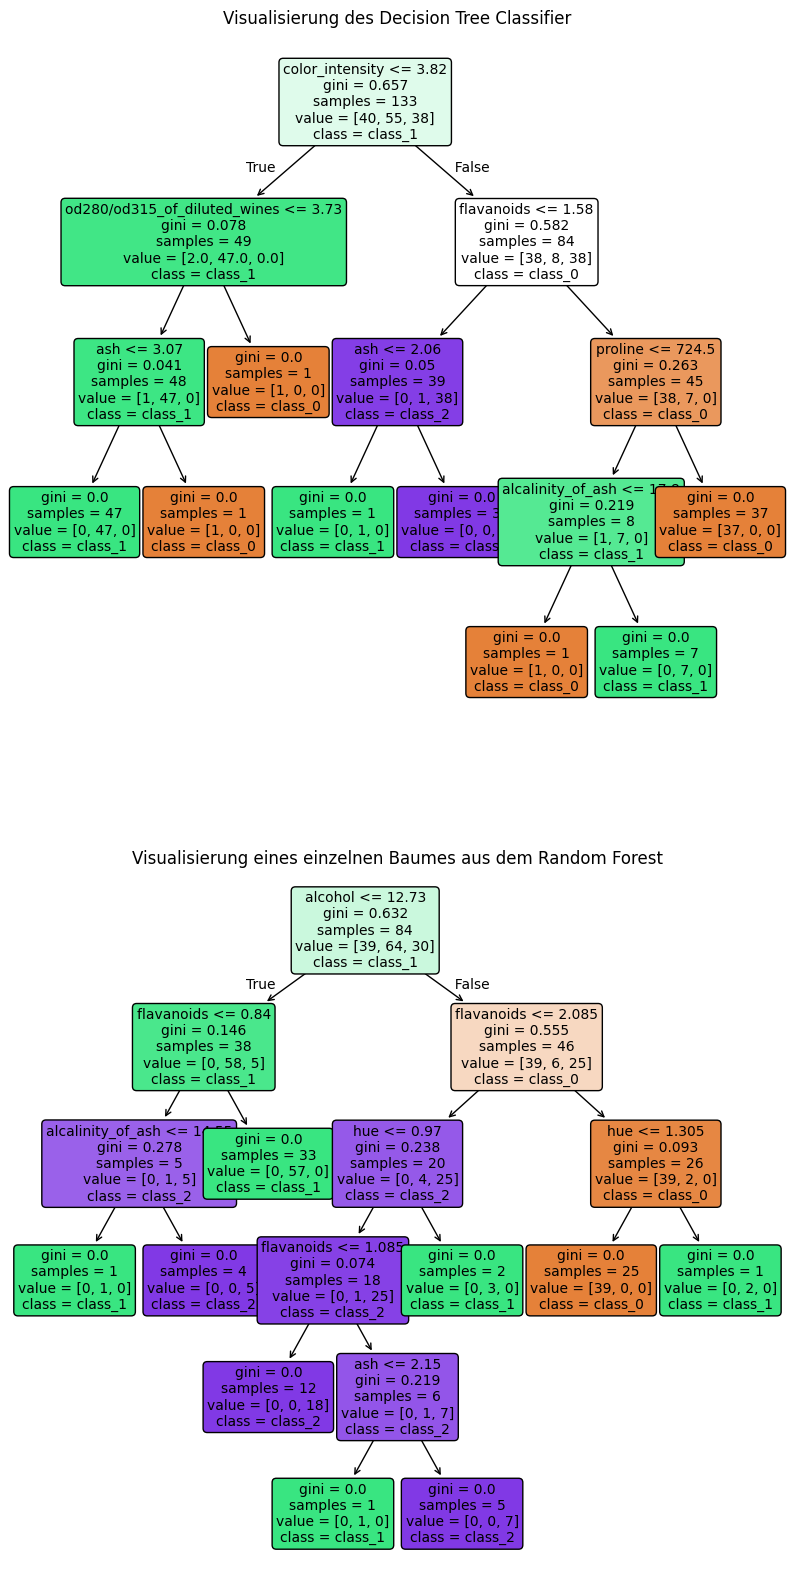

In [7]:
from sklearn.tree import plot_tree

# Visualisierung des Decision Tree Classifiers
figure = plt.figure(figsize=(10, 20))

ax = figure.add_subplot(2, 1, 1)
plot_tree(
    models["Decision Tree"],
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    rounded=True,
    fontsize=10,
    ax=ax,
)
ax.set_title("Visualisierung des Decision Tree Classifier")


# Wir wählen den ersten Baum (Index 0) aus dem Forest für die Visualisierung
ax2 = figure.add_subplot(2, 1, 2)
plot_tree(
    models["Random Forest"].estimators_[0],
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    rounded=True,
    fontsize=10,
    ax=ax2
)
ax2.set_title("Visualisierung eines einzelnen Baumes aus dem Random Forest")
plt.show()
